<a href="https://colab.research.google.com/github/Shivamani162/AIML/blob/main/2303A52344_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "/content/day.csv"
df = pd.read_csv(url)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "/content/hour.csv"
df = pd.read_csv(url)

In [ ]:
daily_rentals = df.groupby('dteday')['cnt'].sum()
top_5_days = daily_rentals.sort_values(ascending=False).head(5)

print(top_5_days)

dteday
2012-09-15    8714
2012-09-29    8555
2012-09-22    8395
2012-03-23    8362
2012-05-19    8294
Name: cnt, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "/content/hour.csv"
df = pd.read_csv(url)
df['dteday'] = pd.to_datetime(df['dteday'])

df['weekend'] = df['dteday'].dt.weekday.isin([5, 6]).astype(int)
holidays_rentals = df.groupby(['dteday', 'weekend'])['cnt'].sum()
top_holidays = holidays_rentals[holidays_rentals.index.get_level_values(1) == 1].sort_values(ascending=False).head(5)
print(top_holidays)

dteday      weekend
2012-09-15  1          8714
2012-09-29  1          8555
2012-09-22  1          8395
2012-05-19  1          8294
2012-09-09  1          8227
Name: cnt, dtype: int64


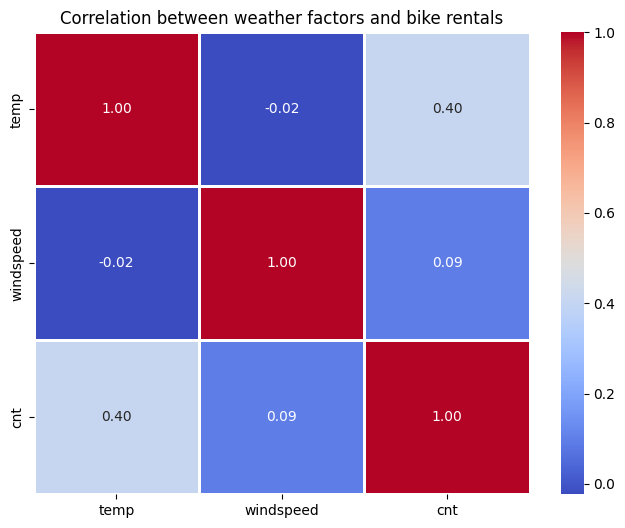

In [ ]:
corr_matrix = df[['temp','windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation between weather factors and bike rentals")
plt.show()

In [ ]:
weather_rentals = df.groupby('weathersit')['cnt'].mean()
best_weather = weather_rentals.sort_values(ascending=False).head(1)
print(best_weather)

weathersit
1    204.869272
Name: cnt, dtype: float64


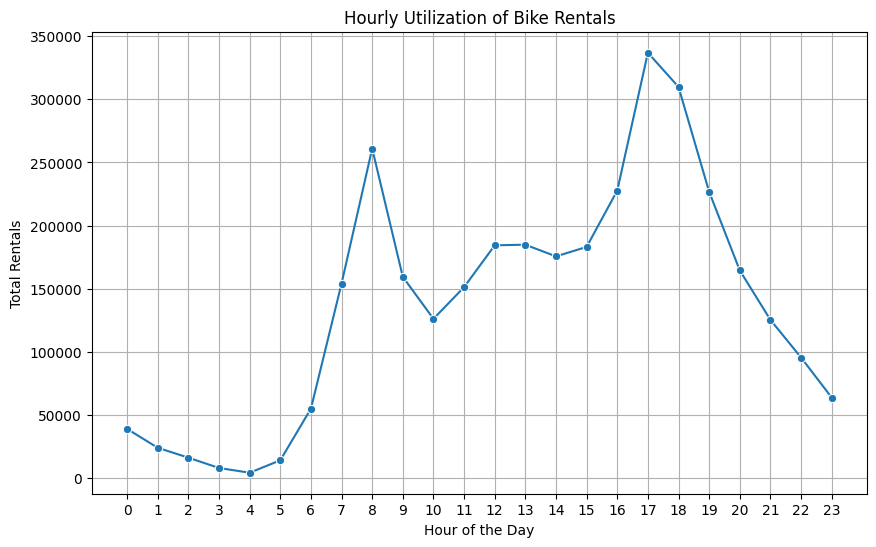

In [ ]:
hourly_rentals = df.groupby('hr')['cnt'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')
plt.title("Hourly Utilization of Bike Rentals")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.show()